In [1]:
#@title Import Brax and some helper modules
from IPython.display import clear_output

import collections
from datetime import datetime
import functools
import math
import time
from typing import Any, Callable, Dict, Optional, Sequence

try:
	import brax
except ImportError:
	!pip install git+https://github.com/google/brax.git@main
	clear_output()
	import brax

from brax import envs
from brax.envs import to_torch
from brax.io import metrics
from brax.training.agents.ppo import train as ppo
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

# have torch allocate on device first, to prevent JAX from swallowing up all the
# GPU memory. By default JAX will pre-allocate 90% of the available GPU memory:
# https://jax.readthedocs.io/en/latest/gpu_memory_allocation.html
DEVICE = "cpu" if not torch.cuda.is_available() else "cuda"
v = torch.ones(1, device=DEVICE)

/usr/users/bdmagr1/abbas/anaconda3/envs/reinforcement_learning/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/users/bdmagr1/abbas/anaconda3/envs/reinforcement_learning/lib/python3.10/site-packages/glfw/__init__.py:912: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


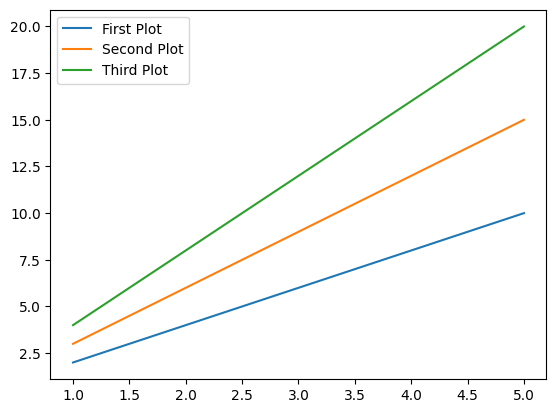

In [1]:
import matplotlib.pyplot as plt

# Data for the first plot
x1 = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]

# Data for the second plot
x2 = [1, 2, 3, 4, 5]
y2 = [3, 6, 9, 12, 15]

# Data for the third plot
x3 = [1, 2, 3, 4, 5]
y3 = [4, 8, 12, 16, 20]

# Create a figure and axes
fig, ax = plt.subplots()

# Add the first plot
ax.plot(x1, y1, label='First Plot')

# Add the second plot
ax.plot(x2, y2, label='Second Plot')

# Add the third plot
ax.plot(x3, y3, label='Third Plot')

# Add a legend
ax.legend()

# Display the figure
plt.show()


In [2]:
DEVICE = "cpu"

In [3]:
gym_name = f'FetchSlide-v2'
if gym_name not in gym.envs.registry.keys():
	entry_point = functools.partial(envs.create_gym_env, env_name=gym_name)
	gym.register(gym_name, entry_point=entry_point)
# env = gym.make(gym_name, batch_size=num_envs, episode_length=episode_length)
env = gym.make(gym_name)
# automatically convert between jax ndarrays and torch tensors:
env = to_torch.JaxToTorchWrapper(env, device=DEVICE)

In [4]:
env

<JaxToTorchWrapper<TimeLimit<OrderEnforcing<PassiveEnvChecker<MujocoFetchSlideEnv<FetchSlide-v2>>>>>>

In [5]:
_ = env.reset()

In [6]:
action = torch.zeros(env.action_space.shape).to(DEVICE)

In [7]:
a = ({'observation': [ 9.95910465e-01,  7.48913814e-01,  4.16069922e-01,  1.04896346e+00,
        8.36844884e-01,  4.14023388e-01,  5.30529948e-02,  8.79310709e-02,
       -2.04653474e-03,  0.00000000e+00,  0.00000000e+00,  5.42714762e-03,
       -6.44712672e-04, -2.40447348e-02, -5.85025884e-05,  3.47088392e-05,
       -2.81409006e-03, -1.87731081e-02, -1.77318698e-03, -6.81228636e-03,
        1.57984089e-05, -1.63635264e-06,  2.89131317e-03,  6.38642398e-07,
        1.41205628e-07], 'achieved_goal': [1.04896346, 0.83684488, 0.41402339], 'desired_goal': [1.60595681, 0.46561395, 0.41401894]}, -1.0, False, False, {'is_success': 0.0})

In [19]:
a[4]

{'is_success': 0.0}

In [14]:
obs, reward, done, info = a[0]

ValueError: not enough values to unpack (expected 4, got 3)

In [9]:
env.step(action)

[0. 0. 0. 0.]
({'observation': array([ 9.95910465e-01,  7.48913814e-01,  4.16069922e-01,  9.08776468e-01,
        8.35710827e-01,  4.14022411e-01, -8.71339967e-02,  8.67970133e-02,
       -2.04751084e-03,  0.00000000e+00,  0.00000000e+00,  5.42205988e-03,
       -6.38803015e-04, -2.43116701e-02, -5.85028160e-05,  3.52684767e-05,
       -2.81772076e-03, -1.87561313e-02, -5.18045115e-04, -7.40105384e-03,
        1.57984089e-05, -1.63635264e-06,  2.89131317e-03,  6.38642398e-07,
        1.41205628e-07]), 'achieved_goal': array([0.90877647, 0.83571083, 0.41402241]), 'desired_goal': array([1.34718458, 0.8321533 , 0.41401894])}, -1.0, False, False, {'is_success': 0.0})
<class 'tuple'>


ValueError: too many values to unpack (expected 4)

In [ ]:
env.action_space.shape

In [ ]:
gym_env = JaxToTorchWrapper(env, device=DEVICE)

In [ ]:
gym_env

In [ ]:
obs = gym_env.reset()

In [ ]:
obs

In [ ]:
action = torch.rand(gym_env.action_space.shape, device=DEVICE) * 2 - 1

In [ ]:
action

In [ ]:
gym_env.step(action)

In [ ]:
sorted(list(gym.envs.registry.keys()))

In [ ]:
obs, reward, done, info = gym_env.step(action)